In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [24]:
import math
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import statsmodels.api as sm
from scipy.stats.kde import gaussian_kde
from datetime import datetime, date, time, timedelta

In [25]:
pd.set_option('display.max_rows', 500)

In [26]:
df_s001_path = ".../ex_c-minute-trade.csv"
df_s001_data = pd.read_csv(df_s001_path, delimiter=",", index_col = 0, header=0)

In [5]:
df_s001_data.set_index(pd.to_datetime(df_s001_data.index).date, inplace=True)

In [6]:
df_s001_data.tail()

,Time,Open,High,Low,Close,TotalVolume
2016-10-06,15:58:00,2902.0,2902.0,2901.0,2901.0,679
2016-10-06,15:59:00,2901.0,2903.0,2901.0,2903.0,1257
2016-10-06,16:00:00,2902.0,2904.0,2900.0,2901.0,3473
2016-10-06,16:01:00,2901.0,2901.0,2901.0,2901.0,8
2016-10-06,16:04:00,2901.0,2901.0,2901.0,2901.0,170


In [7]:
df_s001_data.isnull().sum()

Time           0
Open           0
High           0
Low            0
Close          0
TotalVolume    0
dtype: int64

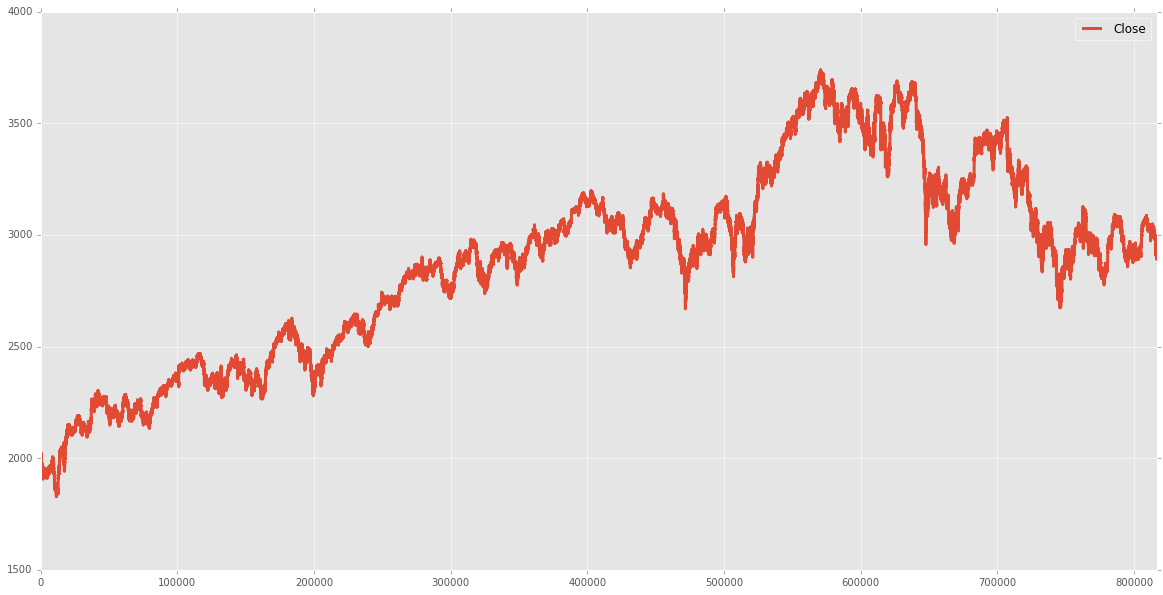

In [8]:
df_s001_data.plot(use_index=False, y=['Close'], figsize=(20, 10), linewidth=3)

In [9]:
year_list_t = list({e.year for e in df_s001_data.index})
print(year_list_t)

[2016, 2012, 2013, 2014, 2015]


In [10]:
filter_t = [i.year in [2012,2013] for i in df_s001_data.index]

In [11]:
df_s001_data_f = df_s001_data[filter_t]
day_list_t = df_s001_data_f.index.unique()

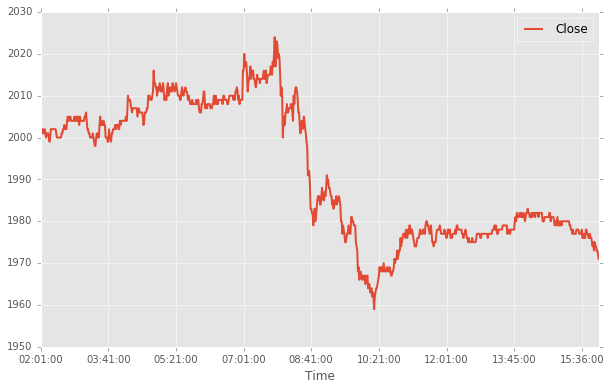

In [12]:
day_n = 0
actual_day = day_list_t[day_n]
df_s001_data_f[df_s001_data_f.index == actual_day].plot(x='Time', y=['Close'], linewidth=2, figsize=(10, 6))

In [13]:
short_ma = 20
long_ma = 50
df_s001_data_f.loc[:,'MA_C_20'] = df_s001_data_f.Close.rolling(short_ma).mean() 
df_s001_data_f.loc[:,'MA_C_50'] = df_s001_data_f.Close.rolling(long_ma).mean() 
df_s001_data_f.loc[:,'MA_C_20_50_Diff'] = df_s001_data_f['MA_C_20'] - df_s001_data_f['MA_C_50']

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
#df_s001_data.plot(x=df_s001_data.index, y=['Close','MA_C_20','MA_C_50'], linewidth=3, figsize=(20, 10))

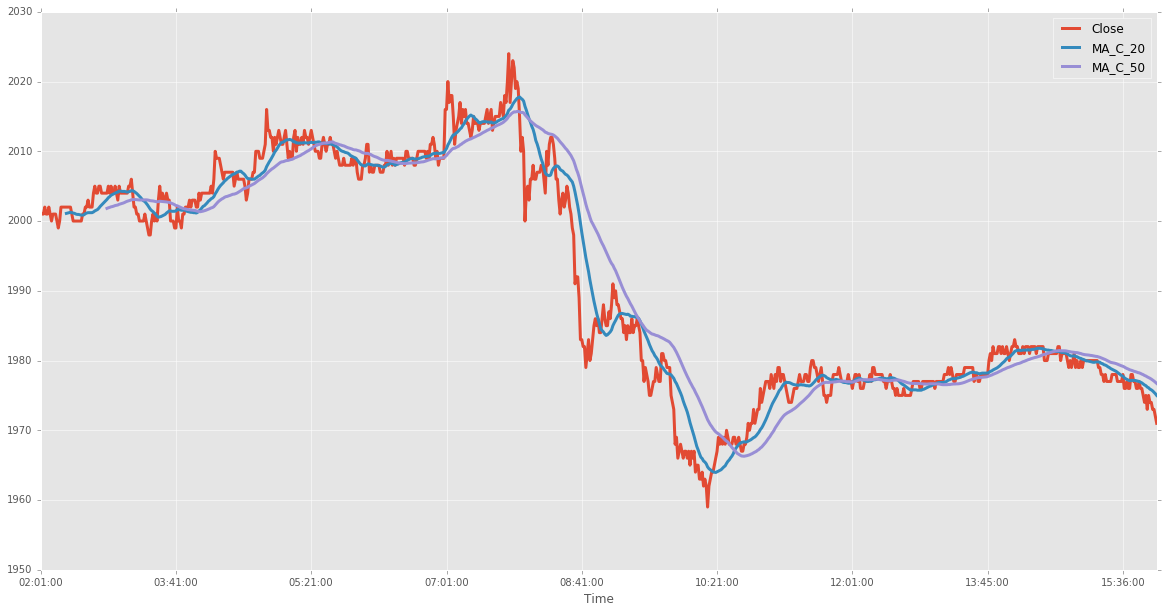

In [15]:
df_s001_data_f[df_s001_data_f.index == actual_day].plot(x='Time', y=['Close','MA_C_20','MA_C_50'], 
                                                        linewidth=3, figsize=(20, 10))

In [16]:
buy_t = (df_s001_data_f['MA_C_20'] >= df_s001_data_f['MA_C_50']) & \
        (df_s001_data_f['MA_C_20'].shift(1) <= df_s001_data_f['MA_C_50'].shift(1))

In [17]:
df_s001_data_buy_t = df_s001_data_f[buy_t]
#df_s001_data_buy_t.set_index(pd.to_datetime(df_s001_data_buy_t.index).date, inplace=True)
#day_list_t = [v.date() for v in pd.to_datetime(df_s001_data_buy_t.index).unique()]

In [18]:
df_s001_data_buy_t

,Time,Open,High,Low,Close,TotalVolume,MA_C_20,MA_C_50,MA_C_20_50_Diff
2012-05-07,03:58:00,2002.0,2004.0,2002.0,2004.0,187,2001.45,2001.36,0.09
2012-05-07,05:30:00,2010.0,2012.0,2009.0,2012.0,990,2011.20,2011.16,0.04
2012-05-07,06:27:00,2008.0,2011.0,2008.0,2009.0,504,2008.35,2008.28,0.07
2012-05-07,09:23:00,1986.0,1986.0,1985.0,1985.0,568,1986.05,1986.00,0.05
2012-05-07,10:34:00,1968.0,1969.0,1968.0,1969.0,1617,1967.15,1967.12,0.03
2012-05-07,12:02:00,1977.0,1977.0,1977.0,1977.0,7,1977.05,1976.94,0.11
2012-05-07,12:20:00,1977.0,1978.0,1977.0,1978.0,265,1977.35,1977.32,0.03
2012-05-07,13:03:00,1977.0,1977.0,1976.0,1977.0,94,1976.70,1976.66,0.04
2012-06-07,02:45:00,1970.0,1972.0,1970.0,1972.0,197,1968.70,1968.70,0.00
2012-06-07,02:46:00,1971.0,1972.0,1969.0,1970.0,526,1968.85,1968.62,0.23


In [19]:
actual_day = df_s001_data_f.index[0]

df_actual_day = df_s001_data_f.loc[actual_day]
df_actual_day.reset_index(inplace=True, drop=True)
#df_actual_day

In [20]:
df_PnL = pd.DataFrame(columns = ['Date','Open_Long_Time','Close_Long_Time','Open_Price', 'Close_Price']) 
PnL_day_values = dict.fromkeys(day_list_t, .0)

sell_lag_in_indices = 5
av_sell_lag_in_minutes = 0
actual_day = df_s001_data_f.index[0]

df_actual_day = df_s001_data_f.loc[actual_day]
df_actual_day.reset_index(inplace=True)
df_actual_day_len = len(df_actual_day)

for i, row in df_s001_data_buy_t.iterrows():
    
    if i != pd.to_datetime(actual_day).date():
        
        df_actual_day = df_s001_data_f.loc[i] 
        df_actual_day.reset_index(inplace=True)
        df_actual_day_len = len(df_actual_day)
        
        #break
        
    long_start_index = df_actual_day[df_actual_day['Time']==row['Time']].index.tolist()[0]   
    actual_sell_lag_in_indices = min((long_start_index + sell_lag_in_indices),(df_actual_day_len-1))
    
    PnL = (df_actual_day['Close'][actual_sell_lag_in_indices] - df_actual_day['Close'][long_start_index])
    #print(long_start_index)
    #print(actual_sell_lag_in_indices)
    #print(PnL)
    df_PnL.loc[len(df_PnL)] = [actual_day,
                               df_actual_day['Time'][long_start_index], 
                               df_actual_day['Time'][actual_sell_lag_in_indices],
                               df_actual_day['Close'][long_start_index],
                               df_actual_day['Close'][actual_sell_lag_in_indices]]
    PnL_day_values[i] += PnL   
    #av_sell_lag_in_minutes += (df_actual_day['Time'][actual_sell_lag_in_indices]-\
    #                                                      df_actual_day['Time'][long_start_index])
#av_sell_lag_in_minutes /= len(df_s001_data_buy_t)

In [21]:
#PnL_day_values
#df_PnL

In [22]:
kde_sm = sm.nonparametric.KDEUnivariate(PnL_day_values.values()) 
kde_sm.fit(kernel='epa', fft=False, bw="normal_reference", cut = 3, adjust = 1)
kde_sp = gaussian_kde(PnL_day_values.values())

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


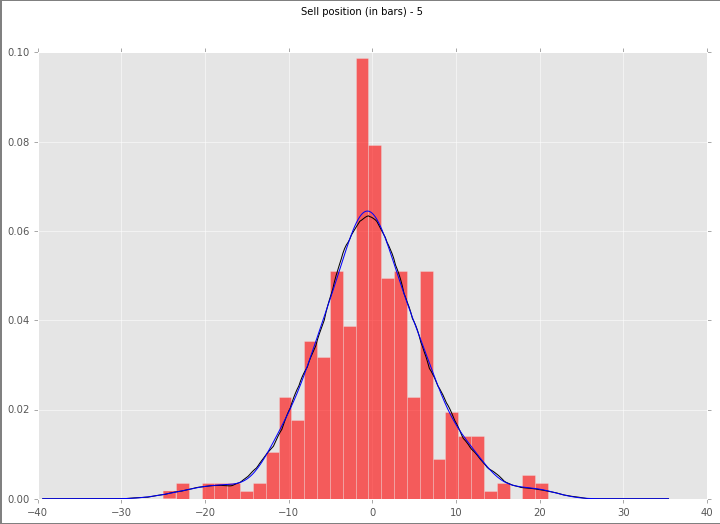

In [23]:
fig, ax = plt.subplots(figsize=(12, 8), linewidth=3)
fig.suptitle('Sell position (in bars) - ' + str(sell_lag_in_indices))
ax.hist(PnL_day_values.values(), bins=30, normed=True, color='red', alpha = 0.6)
ax.plot(kde_sm.support, kde_sm.density, color='black')
ax.plot(kde_sm.support, kde_sp(kde_sm.support), color='blue')